# Student Performance in Exams-EDA

 The main aim of this project is to understand the **student performance** is based on what factors.       
 The factors include:
* The influence of the parents education background
* Test preparation course
* The type of lunch 
* Their race/ethnicity


In [159]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [160]:
## Loading dataset
dataset=pd.read_csv('StudentsPerformance.csv')
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Overview

In [96]:
dataset.shape

(1000, 8)

In [97]:
dataset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [98]:
## Finding out missing values
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are **no missing values** in the data set

In [99]:
dataset.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

From the dataset we can see that there are
* **5 categorical feature**
* **3 discrete feature**

In [161]:
## adding a new feature of total marks
dataset['total_marks']=dataset['math score']+dataset['reading score']+dataset['writing score']

## Seperating the features


In [101]:
categorical_feature=[feature for feature in dataset if dataset[feature].dtypes=='O']
dataset[categorical_feature].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [102]:
discrete_feature=[feature for feature in dataset if dataset[feature].dtype !='O']
dataset[discrete_feature].head()

,math score,reading score,writing score,total_marks
0,72,72,74,218
1,69,90,88,247
2,90,95,93,278
3,47,57,44,148
4,76,78,75,229


### Analysis of discrete features

In [103]:
## Description of discrete feature
dataset.describe()

,math score,reading score,writing score,total_marks
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


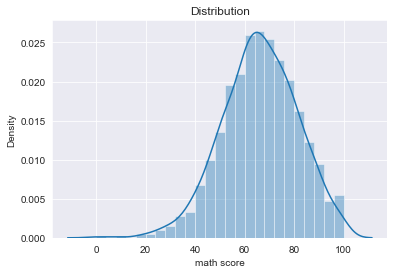

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


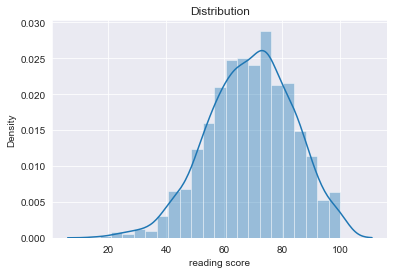

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


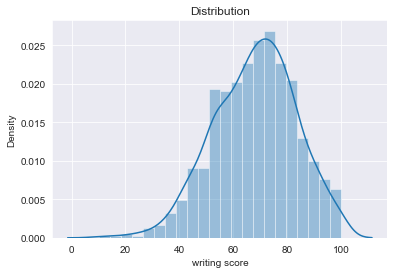

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


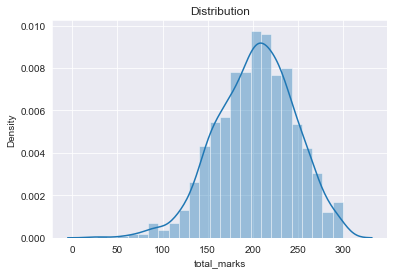

In [104]:

for feature in discrete_feature:
    data=dataset.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title('Distribution')
    plt.show()
    

The distribution of marks of student follows **Normal Distribution**

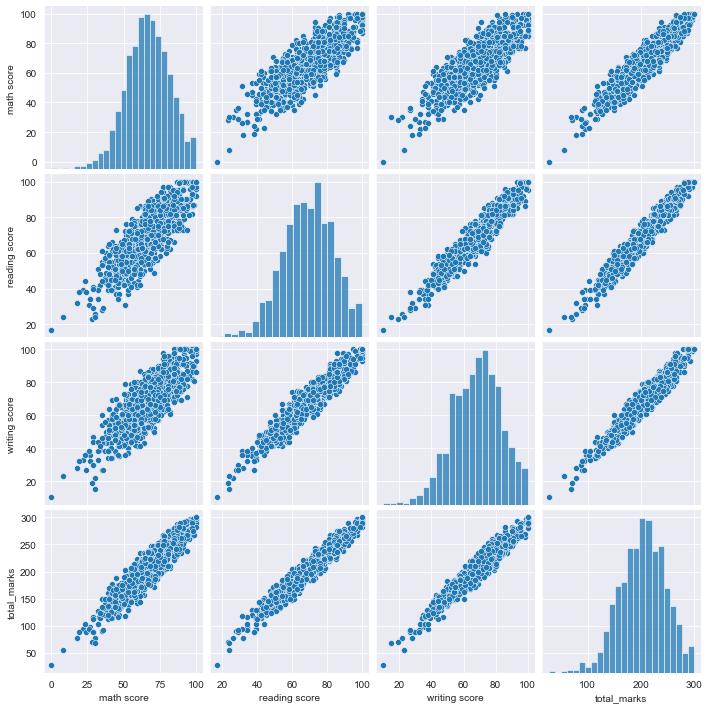

In [105]:
#To find the complete relationship between features
sns.pairplot(dataset[discrete_feature])

We can infer from the above graps that there is **positive correlation** all the score(discrete) features

<AxesSubplot:>

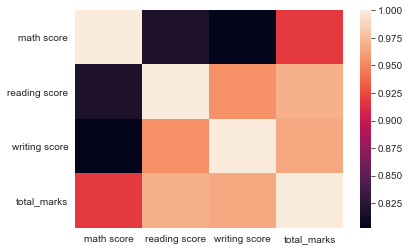

In [106]:
## To know the strength of correlation
sns.heatmap(dataset[discrete_feature].corr())

<AxesSubplot:xlabel='total_marks'>

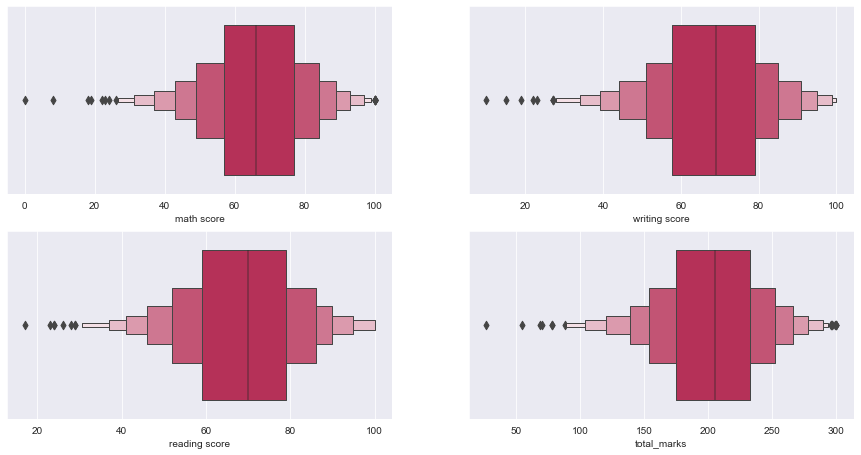

In [107]:
fig=plt.figure(figsize=(40,20))
grids=fig.add_gridspec(5,5)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
axes=[ax00,ax01,ax10,ax11]

sns.boxenplot(data=dataset,x='math score',palette='rocket',ax=ax00)
sns.boxenplot(data=dataset,x='writing score',palette='rocket',ax=ax01)
sns.boxenplot(data=dataset,x='reading score',palette='rocket',ax=ax10)
sns.boxenplot(data=dataset,x='total_marks',palette='rocket',ax=ax11)



### Analysis of categorical features

In [108]:
dataset[categorical_feature].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [109]:
dataset[categorical_feature].isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
dtype: bool

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

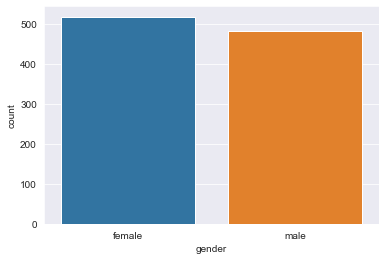

In [110]:
sns.countplot('gender',data=dataset)

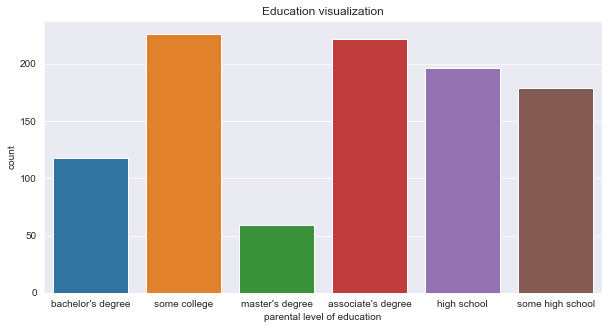

In [111]:
plt.figure(figsize=(10,5))
sns.countplot(x='parental level of education', data=dataset)
plt.title('Education visualization')
plt.show()

Text(0.5, 0, 'Types of groups')

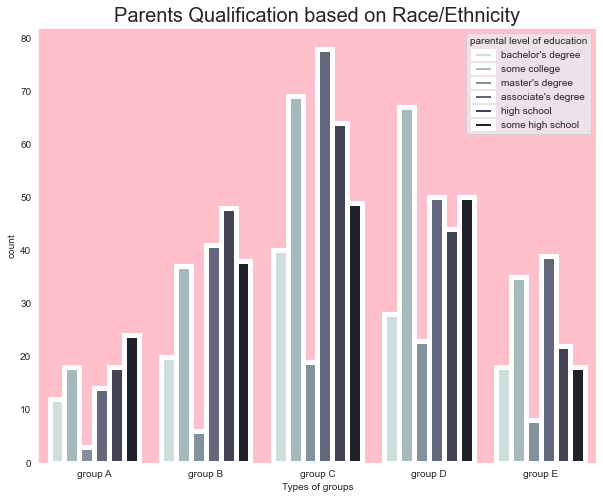

In [112]:
plt.figure(figsize = (10,8))
ax = plt.axes()
ax.set(facecolor = 'pink')
ax.grid(False)
sns.countplot(data = dataset,x = 'race/ethnicity',hue = 'parental level of education',palette = 'bone_r',linewidth=5,order = dataset['race/ethnicity'].value_counts().index.sort_values(ascending=True))
plt.title('Parents Qualification based on Race/Ethnicity',fontsize = 20)
plt.xlabel('Types of groups')


We can see **group C** parents have **highest** education qualification and **group A** have the **lowest**

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

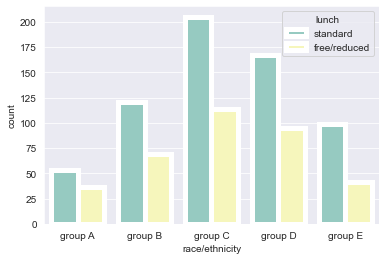

In [113]:
sns.countplot(data = dataset,x = 'race/ethnicity',hue = 'lunch',palette = 'Set3',linewidth=5,order = dataset['race/ethnicity'].value_counts().index.sort_values(ascending=True))

We can see **group C** provides the **highest** standard lunch  and **group A** the **lowest**

In [114]:
dataset[categorical_feature].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

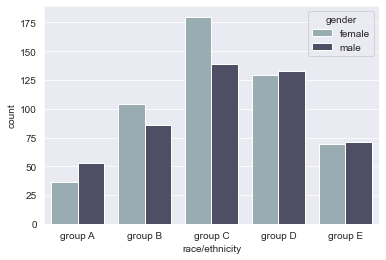

In [115]:
sns.countplot(x=dataset['race/ethnicity'],hue='gender',data=dataset[categorical_feature],color='blue',palette='bone_r',order=dataset['race/ethnicity'].value_counts().index.sort_values(ascending=True))

We can see **group C** have highest group of members and most women and **group A** the lowest

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

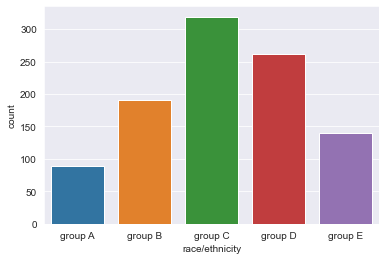

In [157]:
sns.countplot(x=dataset['race/ethnicity'],data=dataset['total_marks'],order=dataset['race/ethnicity'].value_counts().index.sort_values(ascending=True))

**Group C students have highest overall marks**

<AxesSubplot:xlabel='race/ethnicity', ylabel='total_marks'>

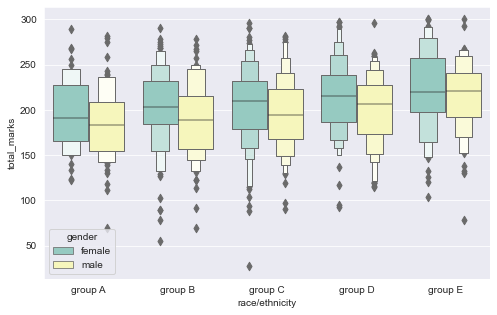

In [158]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.boxenplot(y=dataset['total_marks'],x=dataset['race/ethnicity'],hue=dataset['gender'],order=dataset['race/ethnicity'].value_counts().index.sort_values(ascending=True),hue_order=dataset['gender'].value_counts().index.sort_values(ascending=True),color='.26',palette='Set3')

                                                                          


We can see that **mostly all female students mean** is **better** than **male students mean** in diffrent groups

In [117]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


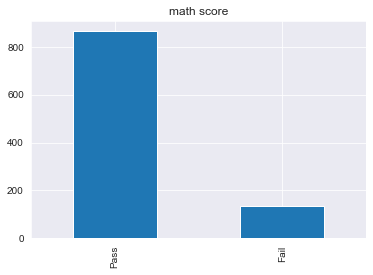

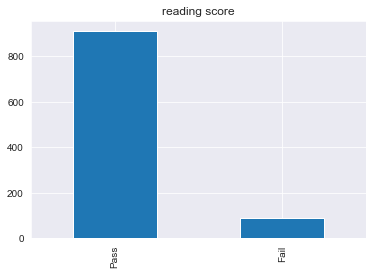

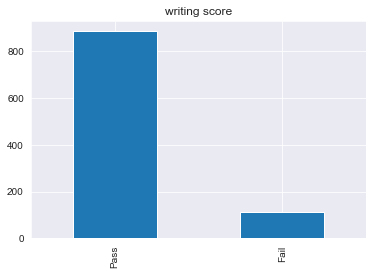

In [137]:
for feature in discrete_feature[0:3]:
    dataset[feature+'_result'] = np.where(dataset[feature]< passmarks, 'Fail', 'Pass')
    dataset[feature+'_result'].value_counts(dropna = False).plot.bar()
    plt.title(feature)
    plt.show()

In [134]:
dataset.head()
    

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks,math score_result,reading score_result,writing score_result,total_marks_result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,247,Pass,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Fail,Pass,Fail,Pass
4,male,group C,some college,standard,none,76,78,75,229,Pass,Pass,Pass,Pass


<AxesSubplot:xlabel='lunch', ylabel='total_marks'>

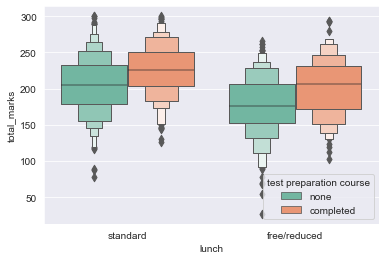

In [156]:
sns.boxenplot(y=dataset['total_marks'],x=dataset['lunch'],hue=dataset['test preparation course'],order=dataset['lunch'].value_counts().index.sort_values(ascending=False),hue_order=dataset['test preparation course'].value_counts().index.sort_values(ascending=False),color='.28',palette='Set2')


We can see the ones with **standard lunch with completed test preperation performs the best**

<AxesSubplot:xlabel='parental level of education', ylabel='total_marks'>

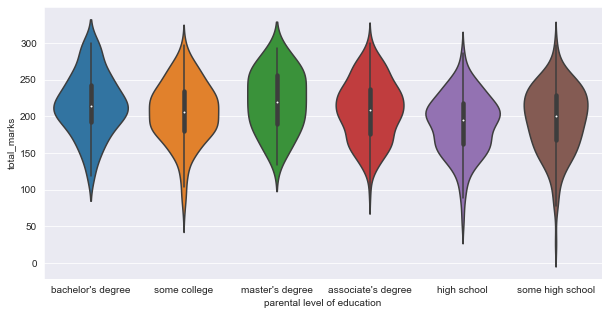

In [181]:
plt.figure(figsize=(10,5))
sns.violinplot(y=dataset['total_marks'],x=dataset['parental level of education'])